# Project: Wrangling and Analyze Data
## Table of Contents
<ul>
<li><a href="#gathering">Data Gathering</a></li>
<li><a href="#asseing">Assesing Data</a></li>
<li><a href="#clean">Cleaning Data</a></li>
<li><a href="#store">Storing Data</a></li>
<li><a href="#insight">Analyzing and Visualizing Data</a></li>
</ul>

### importing libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import json
import re

<a id='gathering'></a>
## Data Gathering 
##### gatherind data from twitter-archive-enhanced.csv',

In [2]:
tweet_df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
tweet_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


#### gathering data from Twitter API

In [4]:
df_list =[]
with open('tweet-json.txt') as f:
    for i in f:
        df_list.append(json.loads(i))

In [5]:
tweet_df_api = pd.DataFrame(df_list,columns = ['id','retweet_count','favorite_count'])

In [6]:
tweet_df_api.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### gathering image prediction data 

In [7]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image-predictions.tsv',mode = 'wb') as file:
    file.write(response.content)

image_predict_df = pd.read_csv('image-predictions.tsv',sep ='\t')

In [8]:
image_predict_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


<a id='asseing'></a>
## Assessing Data

In [9]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

*we can see that tweet_id is intger but it should be string
also timestamp should be in datatime*


In [10]:
tweet_df[tweet_df['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


these 181 rows need to be removed

In [11]:
tweet_df[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [12]:
tweet_df[tweet_df['rating_denominator']==0][['rating_numerator','rating_denominator']]

,rating_numerator,rating_denominator
313,960,0


*row 313 have the value 0 which is illegal*

In [13]:
filt =tweet_df['rating_denominator']==10

In [14]:
tweet_df[['rating_numerator','rating_denominator']][~filt]

,rating_numerator,rating_denominator
313,960,0
342,11,15
433,84,70
516,24,7
784,9,11
902,165,150
1068,9,11
1120,204,170
1165,4,20
1202,50,50


*the demnominator should be 10*

In [15]:
filt =tweet_df['rating_numerator']<10
tweet_df[['rating_numerator','rating_denominator']][filt]

,rating_numerator,rating_denominator
45,5,10
229,6,10
315,0,10
387,7,10
462,7,10
...,...,...
2351,5,10
2352,6,10
2353,9,10
2354,7,10


*the numenator is less than 10 but we know than it should be more than 10*

In [16]:
tweet_df['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

*there are some missing and wrong names*

In [17]:
tweet_df_api

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


*there are 2354 rows instead of 2356*

In [18]:
image_predict_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [19]:
image_predict_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [20]:
image_predict_df[image_predict_df['p1_conf']<=0.044334]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
38,666644823164719104,https://pbs.twimg.com/media/CUBl6IwVAAA9_zT.jpg,1,Ibizan_hound,0.044333,True,Pembroke,0.043209,True,West_Highland_white_terrier,0.038906,True


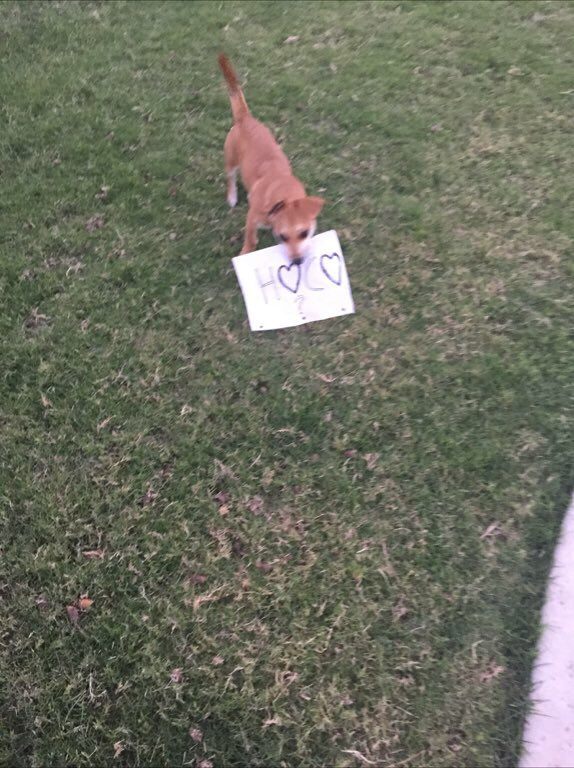

In [21]:
from IPython import display
display.Image("https://pbs.twimg.com/media/CUBl6IwVAAA9_zT.jpg")

In [22]:
image_predict_df['p1']

0       Welsh_springer_spaniel
1                      redbone
2              German_shepherd
3          Rhodesian_ridgeback
4           miniature_pinscher
                 ...          
2070                    basset
2071               paper_towel
2072                 Chihuahua
2073                 Chihuahua
2074                    orange
Name: p1, Length: 2075, dtype: object

In [23]:
image_predict_df[image_predict_df['p1']=='paper_towel']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
476,675153376133427200,https://pbs.twimg.com/media/CV6gaUUWEAAnETq.jpg,1,paper_towel,0.327957,False,mailbox,0.096027,False,seat_belt,0.034995,False
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False


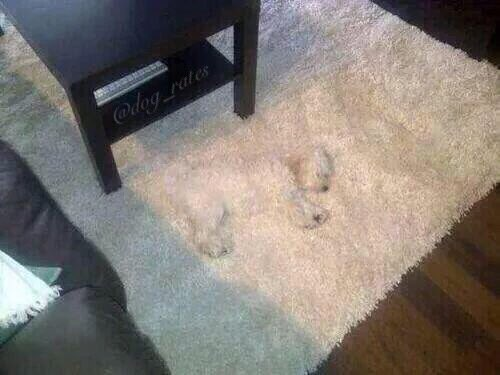

In [24]:
display.Image("https://pbs.twimg.com/media/CV6gaUUWEAAnETq.jpg")

*its seems that the model make a mistake here in recognizing that fluffy dog*

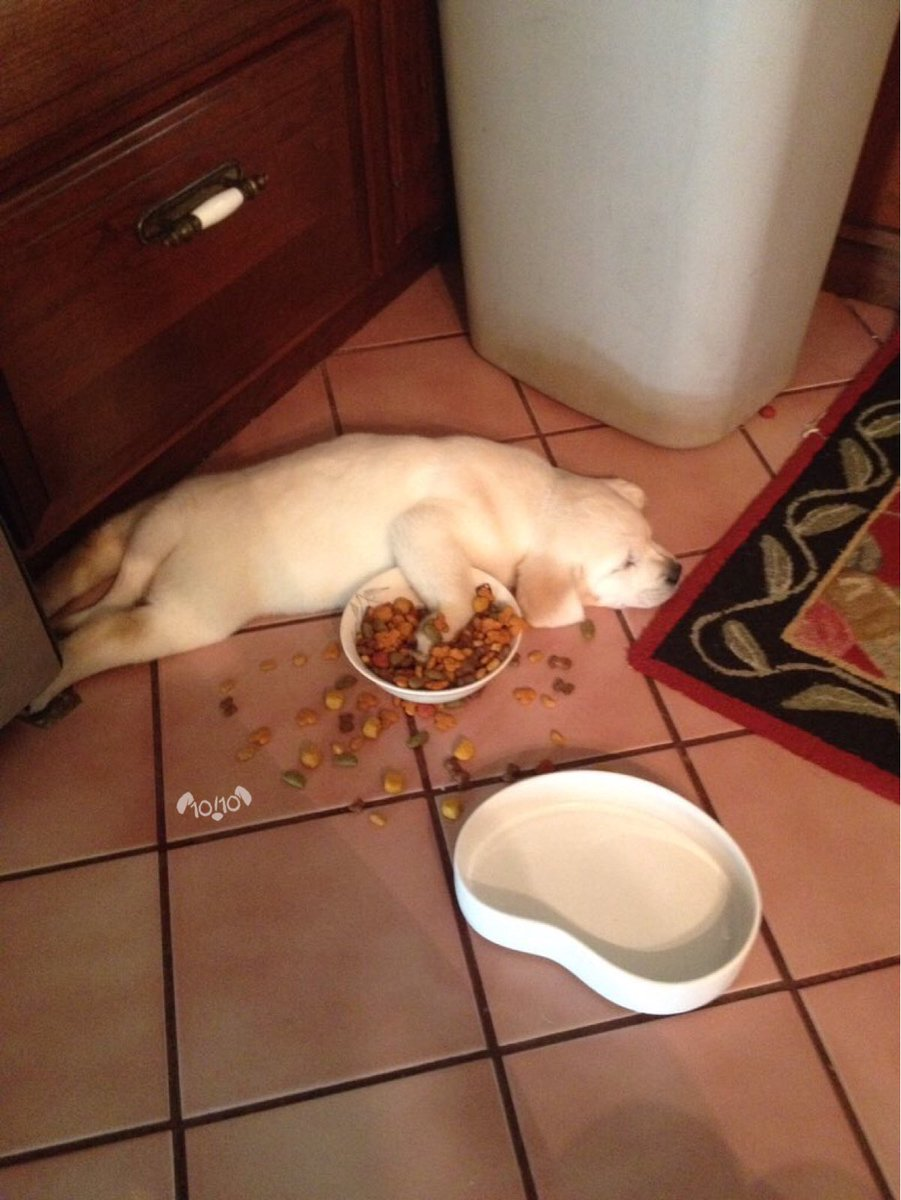

In [25]:
display.Image("https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg")

## Quality issues
1. some missing or invalid names (ex 'a')

<img src="pics\1.png">

2. twitter_id is intger but should be string


3. timestamp is string but should be datatime 

<img src="pics\2-3.png">

4. the dominator in the row 313 is 0 aslo the numerator is very high it is 960 

<img src="pics\4.png">

5. rating_denominator values not equal 10

<img src="pics\5.png">

6. rating_numerator values less than 10

<img src="pics\6.png">

8. remove all rows that contain retweets

9. some columns is almost empty ex(in_reply_to_status_id)

<ul>
    <li><h3>tweet_df</h3>
        <ul>
            <li><a href="#1">some missing or invalid names (ex 'a')</a></li>
            <li><a href="#2">twitter_id is intger but should be string</a></li>
            <li><a href="#3">timestamp is string but should be datatime</a></li>
            <li><a href="#4">the dominator in the row 313 is 0 aslo the numerator is very high it is 960 </a></li>
            <li><a href="#5">rating_denominator values not equal 10</a></li>
            <li><a href="#6">rating_numerator values less than 10</a></li>
            <li><a href="#7">181 rows with a retweet id need to be removed</a></li>
            <li><a href="#8">some columns is almost empty ex(in_reply_to_status_id)</a></li>
            <li><a href="#9">row 476 says paper_towel but the pic is for white fluffy white</a></li> 
        </ul>
    </li>
<li><h3>image_predict_df</h3>
        <ul>
            <li><a href="#9">row 476 says paper_towel but the pic is for white fluffy white dog </a></li>
        </ul>
   
 
<li><h3>tweet_df_api</h3>
        <ul>
            <li>tweet_df_api there are two missing values (2354 insted of 2356) </li>
        </ul>    

</ul>  

### Tidiness issues
<ul>
    <li><a href="#11">not consistent tweet_df_api id  column name (id insted of tweet_id))</a></li>
    <li><a href="#12">dog stages aren't in one column</a></li>
    <li><a href="#13">data separted in 3 dataframes instead of one</a></li>
</ul>


<a id='clean'></a>
## Cleaning Data

##### Make copies of original pieces of data

In [26]:
tweet_df_copy=tweet_df.copy()
tweet_df_api_copy=tweet_df_api.copy()
image_predict_df_copy=image_predict_df.copy()

<a id='1'></a>
### Issue #1:

#### Define:
*extarct all the words from the text, filter them then subistute on the wrong names*

#### Code

In [27]:
tweet_df_copy['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

#### ## the maximum repeated name was 12 times so will take all the words that repeated 12 times atmost then will filter them


In [28]:
list1 =[]
for i in tweet_df_copy['text']:
    for j in i.split():
        if j[:5]=='https':
            continue
        list1.append(j)

s = pd.DataFrame(list1)
unique_names = s.value_counts().sort_values()[:82320] ## 82320 is the index of the last word that repetead 12 times
list2 =list(unique_names.index)
list_of_names =[]
not_name=['This','Please','Thank',"We","Happy",'English','Even','Japanese','South','Other','When','These','Instead','Not','Very','Actually','Here','Absolutely','Must','Again','Sorry','Mitsubishi','Probably','Upset','Bookstore','Viewer']
for text in list2:
    m = re.search('(\w+)', str(text))
    if m:
        found = m.group(1)
        if len(found) >1:
            if ((found[0].isupper()) and found[1].islower() and found not in not_name): # filter the list to make sure the name is capitalized and not wrong name
                list_of_names.append(found)

In [29]:
list_of_names

['Oscar',
 'Oshie',
 'Otis',
 'Outdoorsy',
 'Outside',
 'Owl',
 'Ozzie',
 'Ozzy',
 'Islands',
 'Nap',
 'Name',
 'Martha',
 'Martin',
 'Marty',
 'Marvelous',
 'Marvin',
 'Mary',
 'Mason',
 'Master',
 'Matches',
 'Matsuyama',
 'Orion',
 'Original',
 'Oreo',
 'Orbs',
 'Painfully',
 'Palate',
 'Pancake',
 'Panda',
 'Panoramic',
 'Pantaloon',
 'Paperback',
 'Papua',
 'Papyrus',
 'Parakeetian',
 'Park',
 'Parmesan',
 'Parthenon',
 'Passionate',
 'Marshall',
 'Patch',
 'Patrick',
 'Patriotic',
 'Patti',
 'Paul',
 'Paul',
 'Pause',
 'Pack',
 'Naphaniel',
 'Pablo',
 'Ollie',
 'Olympic',
 'Once',
 'Orbited',
 'Patreon',
 'Paesh',
 'Maude',
 'Maya',
 'Mark',
 'Melt',
 'Menace',
 'Menacing',
 'Menorah',
 'Mookie',
 'More',
 'Morgan',
 'Morple',
 'Mosby',
 'Mosby',
 'Motorola',
 'Moves',
 'Mucho',
 'Mug',
 'Murphy',
 'Mutt',
 'Mya',
 'Nails',
 'Nam',
 'Moofasa',
 'Mark',
 'Margo',
 'Maple',
 'Mapaw',
 'Mayo',
 'McCringleberry',
 'Me',
 'Meatball',
 'Meatball',
 'Mediterranean',
 'Meeko',
 'Meera',


In [30]:
def correct_name(name,text):
    not_name=['None','a','the','an','all'] 
    if name in not_name:
        for new_name in text.split():
            if new_name in list_of_names:
                return new_name
    return name # if the name not found in the text as well return the original name  

In [31]:
tweet_df_copy['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [32]:
tweet_df_copy['name'] = tweet_df_copy.apply(lambda x: correct_name(x['name'], x['text']), axis=1)

#### Test

In [33]:
tweet_df_copy['name'].value_counts()

None       293
Charlie     12
Lucy        11
Cooper      11
Oliver      11
          ... 
Sprout       1
Meeko        1
Bloop        1
Lillie       1
Piers        1
Name: name, Length: 1245, dtype: int64

<a id='2'></a>
### Issue #2:

#### Define
*change the type of the id to string in all datasets*

#### Code

In [34]:
tweet_df_copy['tweet_id']=tweet_df_copy['tweet_id'].astype(str)
tweet_df_api_copy['id'] =tweet_df_api_copy['id'].astype(str)
image_predict_df_copy['tweet_id'] =image_predict_df_copy['tweet_id'].astype(str)

#### Test

In [35]:
tweet_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [36]:
tweet_df_api_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [37]:
image_predict_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


<a id='3'></a>
# issue 3

### define
*change the time stamp data type into datetime*

In [38]:
tweet_df_copy['timestamp']=pd.to_datetime(tweet_df_copy['timestamp'])

### test

In [39]:
tweet_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

<a id='4'></a>
### issue 4

### define
*assing 10 the the dominator of the row 313* 

In [40]:
tweet_df_copy.loc[313,'rating_denominator']=10

### test

In [41]:
tweet_df_copy.iloc[313]

tweet_id                                                     835246439529840640
in_reply_to_status_id                                      835245984028504064.0
in_reply_to_user_id                                                  26259576.0
timestamp                                             2017-02-24 21:54:03+00:00
source                        <a href="http://twitter.com/download/iphone" r...
text                          @jonnysun @Lin_Manuel ok jomny I know you're e...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                                                               NaN
rating_numerator                                                            960
rating_denominator                                                           10
name                                    

<a id='5'></a>
# issue 5

### define
*assing the denominator to 10 by diving the numerator by the denominator then multiplying the numerator by 10*

### code

In [42]:
tweet_df_copy['rating_numerator']=tweet_df_copy.apply(lambda x: (x['rating_numerator']/x['rating_denominator'])*10 ,axis = 1)

In [43]:
tweet_df_copy['rating_denominator']=10

### test

In [44]:
(tweet_df_copy['rating_denominator'] != 10).sum()

0

<a id='6'></a>
# issue 6

### define
*add 10 the the numerator less than 10 also set any value grater than 20 to 20*

###  code

In [45]:

tweet_df_copy['rating_numerator']=tweet_df_copy['rating_numerator'].apply(lambda x: x+10 if(x<10) else 20 if (x>20) else x)

###  test

In [46]:
tweet_df_copy[tweet_df['rating_numerator']<10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,15.0,10,Bella,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111...,16.0,10,Jerry,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,10.0,10,None,None,None,None,None
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...","I was going to do 007/10, but the joke wasn't ...",NaN,NaN,NaN,NaN,17.0,10,None,None,None,None,None
462,817502432452313088,NaN,NaN,2017-01-06 22:45:43+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Herschel. He's slightly bi...,6.924173e+17,4.196984e+09,2016-01-27 18:42:06 +0000,https://twitter.com/dog_rates/status/692417313...,17.0,10,Herschel,None,None,pupper,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,15.0,10,Enjoys,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,16.0,10,Piers,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,19.0,10,Big,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,17.0,10,a,None,None,None,None


In [47]:
tweet_df_copy.iloc[313]

tweet_id                                                     835246439529840640
in_reply_to_status_id                                      835245984028504064.0
in_reply_to_user_id                                                  26259576.0
timestamp                                             2017-02-24 21:54:03+00:00
source                        <a href="http://twitter.com/download/iphone" r...
text                          @jonnysun @Lin_Manuel ok jomny I know you're e...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                                                               NaN
rating_numerator                                                           20.0
rating_denominator                                                           10
name                                    

In [48]:
tweet_df_copy.describe()

,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.0
mean,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,12.613566,10.0
std,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,2.649858,0.0
min,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,10.000000,10.0
25%,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,11.000000,10.0
50%,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,12.000000,10.0
75%,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,13.000000,10.0
max,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,20.000000,10.0


<a id='7'></a>
# issue 7

### define
delete all rows that contain retweets

In [49]:
tweet_df_copy =tweet_df_copy[tweet_df_copy['retweeted_status_user_id'].isna()]


### test

In [50]:
tweet_df_copy['retweeted_status_user_id'].notnull().sum()

0

<a id='8'></a>
# issue 8

### define 
*drop all empty and non necessary columns*

In [51]:
tweet_df_copy

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,15.0,10,Enjoys,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,16.0,10,Piers,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,19.0,10,Big,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,17.0,10,a,None,None,None,None


In [52]:
tweet_df_copy.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### code

In [53]:
tweet_df_copy.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_user_id','retweeted_status_timestamp','retweeted_status_timestamp','retweeted_status_id','expanded_urls','source'], axis=1,inplace = True)

###  test

In [54]:
tweet_df_copy.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12.0,10,Franklin,None,None,None,None


<a id='9'></a>
# issue 9

### define
*assign the prediction to fluffy*

In [55]:
image_predict_df_copy.loc[476,'p1']='Fluffy'

### test

In [56]:
image_predict_df_copy.loc[476]

tweet_id                                 675153376133427200
jpg_url     https://pbs.twimg.com/media/CV6gaUUWEAAnETq.jpg
img_num                                                   1
p1                                                   Fluffy
p1_conf                                            0.327957
p1_dog                                                False
p2                                                  mailbox
p2_conf                                            0.096027
p2_dog                                                False
p3                                                seat_belt
p3_conf                                            0.034995
p3_dog                                                False
Name: 476, dtype: object

# Tidiness issues


<a id='11'></a>
# issue 1
### define
*rename the column name to tweet_id*

### code

In [57]:
image_predict_df_copy

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [58]:
tweet_df_api_copy=tweet_df_api_copy.rename(columns = {'id':'tweet_id'})

### test

In [59]:
tweet_df_api_copy.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


<a id='12'></a>
# issue 2
### define
*merge all stage in one column using melt function then extarct the missing values from the text*

### code

In [60]:
#replace the none values
tweet_df_copy.loc[:,['doggo','floofer','pupper','puppo']]=tweet_df_copy.loc[:,['doggo','floofer','pupper','puppo']].replace('None',np.NaN)

In [61]:
a= pd.melt(tweet_df_copy, id_vars=[('tweet_id')], value_vars=['doggo', 'floofer','pupper','puppo'],value_name = 'stage')

In [62]:
a=a.dropna(subset=['stage'])

In [63]:
tweet_df_copy = tweet_df_copy.merge(a, how='left', on='tweet_id')

In [64]:
tweet_df_copy.drop(columns=['doggo','floofer','puppo','pupper','variable'],inplace  = True)

In [65]:
# exract the stage from the text 
def extract_stage(stage,text):
    if stage == "None":
        m = re.search('\w*\s*(doggo|floofer|puppo|pupper)\w*\s*', text.lower())
        if m:
            found = m.group(1)
            return found
    else:
        return stage

In [66]:
tweet_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2187 entries, 0 to 2186
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2187 non-null   object             
 1   timestamp           2187 non-null   datetime64[ns, UTC]
 2   text                2187 non-null   object             
 3   rating_numerator    2187 non-null   float64            
 4   rating_denominator  2187 non-null   int64              
 5   name                2187 non-null   object             
 6   stage               356 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(4)
memory usage: 136.7+ KB


In [67]:
tweet_df_copy.fillna('None',inplace =True)

In [68]:
tweet_df_copy['stage'] = tweet_df_copy.apply(lambda x: extract_stage(x['stage'], x['text']), axis=1)

### test

In [69]:
tweet_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2187 entries, 0 to 2186
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2187 non-null   object             
 1   timestamp           2187 non-null   datetime64[ns, UTC]
 2   text                2187 non-null   object             
 3   rating_numerator    2187 non-null   float64            
 4   rating_denominator  2187 non-null   int64              
 5   name                2187 non-null   object             
 6   stage               397 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(4)
memory usage: 136.7+ KB


In [70]:
tweet_df_copy.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12.0,10,Franklin,None


<a id='3'></a>
# issue 10

### define
*merge all data sets into on the id*

In [71]:
tweet_df_api_copy = tweet_df_api_copy.merge(image_predict_df_copy, how='left', on='tweet_id')

In [72]:
twitter_archive_master = tweet_df_copy.merge(tweet_df_api_copy, how='left', on='tweet_id')

### droping dulpicated ids

In [73]:
twitter_archive_master.drop_duplicates(subset='tweet_id',inplace = True)

#### duplicates the unnecessary column

In [74]:
twitter_archive_master.drop(columns='rating_denominator',inplace =True)

### rename the columns name to an apropriate name

In [75]:
twitter_archive_master.columns = twitter_archive_master.columns.str.replace('_', ' ')
twitter_archive_master.columns = twitter_archive_master.columns.str.capitalize()
twitter_archive_master.columns = twitter_archive_master.columns.str.replace(r'(P)', 'Prediction')
twitter_archive_master.columns = twitter_archive_master.columns.str.replace(r'(conf)', 'Confidence')

C:\Users\Ahmed Awwad\AppData\Local\Temp\ipykernel_35428\331693181.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  twitter_archive_master.columns = twitter_archive_master.columns.str.replace(r'(P)', 'Prediction')
C:\Users\Ahmed Awwad\AppData\Local\Temp\ipykernel_35428\331693181.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  twitter_archive_master.columns = twitter_archive_master.columns.str.replace(r'(conf)', 'Confidence')


In [76]:
twitter_archive_master=twitter_archive_master.rename(columns = {'Rating numerator':"Rating"})

### test

In [77]:
twitter_archive_master.head()

,Tweet id,Timestamp,Text,Rating,Name,Stage,Retweet count,Favorite count,Jpg url,Img num,Prediction1,Prediction1 Confidence,Prediction1 dog,Prediction2,Prediction2 Confidence,Prediction2 dog,Prediction3,Prediction3 Confidence,Prediction3 dog
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13.0,Phineas,None,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13.0,Tilly,None,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12.0,Archie,None,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13.0,Darla,None,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12.0,Franklin,None,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


<a id='store'></a>
## Storing Data

In [78]:
twitter_archive_master.to_csv('twitter_archive_master.csv',index = False) 

<a id='insight'></a>
## Analyzing and Visualizing Data

### Insights:


##### first lets see what is the most popular dog breeds according to the favorite counts

In [79]:
twitter_archive_master.groupby(by=["Prediction1"]).sum().sort_values('Favorite count',ascending = False).head()[['Favorite count','Retweet count']]

,Favorite count,Retweet count
Prediction1,,
golden_retriever,1696627,502096
Labrador_retriever,1123850,366682
Pembroke,994755,280367
Chihuahua,676441,220695
Samoyed,542991,184922


#### it seems that the Golden Retriver is the most popular one

##### now lets see which year had the most number of tweets 

In [80]:
twitter_archive_master['Timestamp'].dt.year.value_counts()

2016    1088
2015     688
2017     399
Name: Timestamp, dtype: int64

#### we see that 2016 had the most number of tweets

##### finally lest look at the most common dog stage

In [81]:
twitter_archive_master['Stage'].value_counts()

pupper     250
doggo       95
puppo       31
floofer      9
Name: Stage, dtype: int64

##### it seems that pupper is the most common stage

### Visualization

### the dog stage distribution

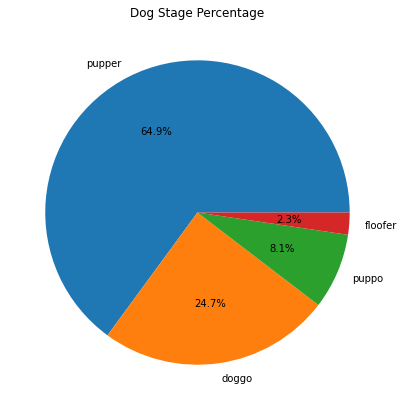

In [82]:
fig = plt.figure(figsize =(10, 7))
plt.pie(twitter_archive_master['Stage'].value_counts(), labels = ['pupper','doggo','puppo','floofer'],autopct='%1.1f%%')
plt.title('Dog Stage Percentage')
plt.show()

##### as we said before pupper is the most common dog stage 

### distribution of the tweets number in the period from 2015 to 217

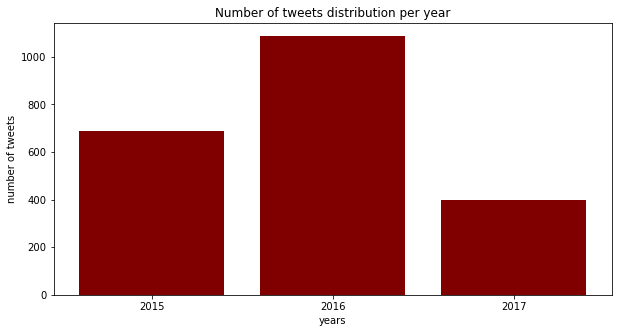

In [83]:
fig = plt.figure(figsize = (10, 5))
years =twitter_archive_master['Timestamp'].dt.year.value_counts().index
no_of_tweets =twitter_archive_master['Timestamp'].dt.year.value_counts()
plt.bar(years,no_of_tweets , color ='maroon',)
plt.xlabel("years")
plt.ylabel("number of tweets")
plt.title("Number of tweets distribution per year")
plt.xticks(years)
plt.show()

### the top 10 dog breed recognized by the model

In [84]:
dogs =twitter_archive_master[twitter_archive_master['Prediction1 dog']==True]['Prediction1'].value_counts()

In [85]:
top_ten=dogs[:10]

In [86]:
top_ten

golden_retriever      139
Labrador_retriever     95
Pembroke               88
Chihuahua              79
pug                    54
chow                   41
Samoyed                40
toy_poodle             38
Pomeranian             38
malamute               29
Name: Prediction1, dtype: int64

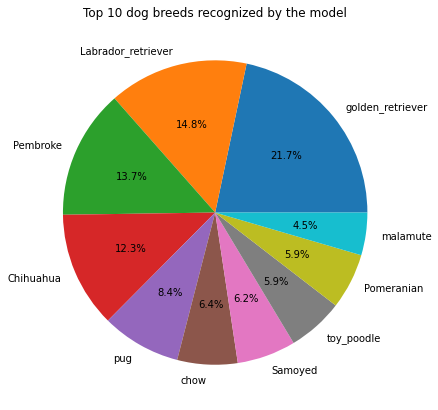

In [87]:
fig = plt.figure(figsize =(10, 7))
plt.pie(top_ten, labels = top_ten.index,autopct='%1.1f%%')
plt.title('Top 10 dog breeds recognized by the model')
# show plot
plt.show()

#### we can see that the Golden Retriver is the most recognized by the model

### now let's check the relation betwen the number of favorites and the number of retweets

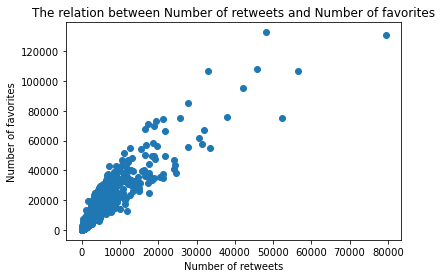

In [88]:
plt.scatter(twitter_archive_master['Retweet count'], twitter_archive_master['Favorite count'])
plt.xlabel("Number of retweets")
plt.ylabel("Number of favorites")
plt.title("The relation between Number of retweets and Number of favorites")
# To show the plot
plt.show()

### we can see clearly the postive correlation between the number of favorites and the number of retweets